In [1]:
!pip install probfit iminuit

In [2]:
import iminuit
import probfit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = [93.4, 89.3, 94.9, 90.7, 89.9, 89.3, 90.9, 93.8, 91.3, 92.9, 91.4, 87.8, 91.5, 89.9, 94.4, 91.3, 88.3, 91.9,
        95.4, 91.1, 92.1, 91.7, 94.3, 92.0, 89.9, 90.6, 91.7, 90.4, 92.6, 93.8, 90.9, 90.4, 89.3,
        94.6, 90.6, 94.1, 89.7, 90.0, 92.8, 93.8, 93.8, 91.7, 88.2, 92.9, 86.6, 90.6, 89.9, 95.3, 92.5, 96.5]
data = np.array(data)

In [4]:
def gauss_fit(x,mu,sig):
    pdf = 1.0 /(np.sqrt(2.0*np.pi*sig**2))*np.exp(-(x-mu)**2/(2.0*sig**2))
    return pdf

In [5]:
def unbinned_gaus_LLH(data,mu_init,sig_init,limit_mu,limit_sig):
    init_params = dict(mu = mu_init, sig = sig_init, limit_sig = limit_sig, limit_mu = limit_mu)
    
#     def negLogL(mu,sig):
#         pdf = gauss_fit(data,mu,sig)
#         if np.any(np.isnan(pdf)) or np.any(pdf <= 0):
#                 return 9e99 # Minuit doesn't like np.nan
#         return -np.sum(np.log(pdf))
    
#     m = iminuit.Minuit(negLogL, errordef=0.5, **init_params )
    unbin = probfit.UnbinnedLH(gauss_fit,data)


    m = iminuit.Minuit(unbin,**init_params)
    
    m.migrad()
    params = m.values.values()
    errs = m.errors.values()
    plt.figure(figsize=(25,10))
    plt.subplot(1,2,1)
    unbin.draw(m)
    plt.subplot(1,2,2)
    m.draw_mncontour('mu','sig',nsigma=4)
    return params, errs

/home/john/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: InitialParamWarning: Parameter mu is floating but does not have initial step size. Assume 1.
  
/home/john/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: InitialParamWarning: Parameter sig is floating but does not have initial step size. Assume 1.
  


FCN = 108.7330934102903 
 TOTAL NCALL = 64 
 NCALLS = 64 
 
 
 EDM = 1.2092754989103733e-06 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,mu,91.6544,0.301082,,,80,100,No
1,sig,2.12929,0.212764,,,1,10,No


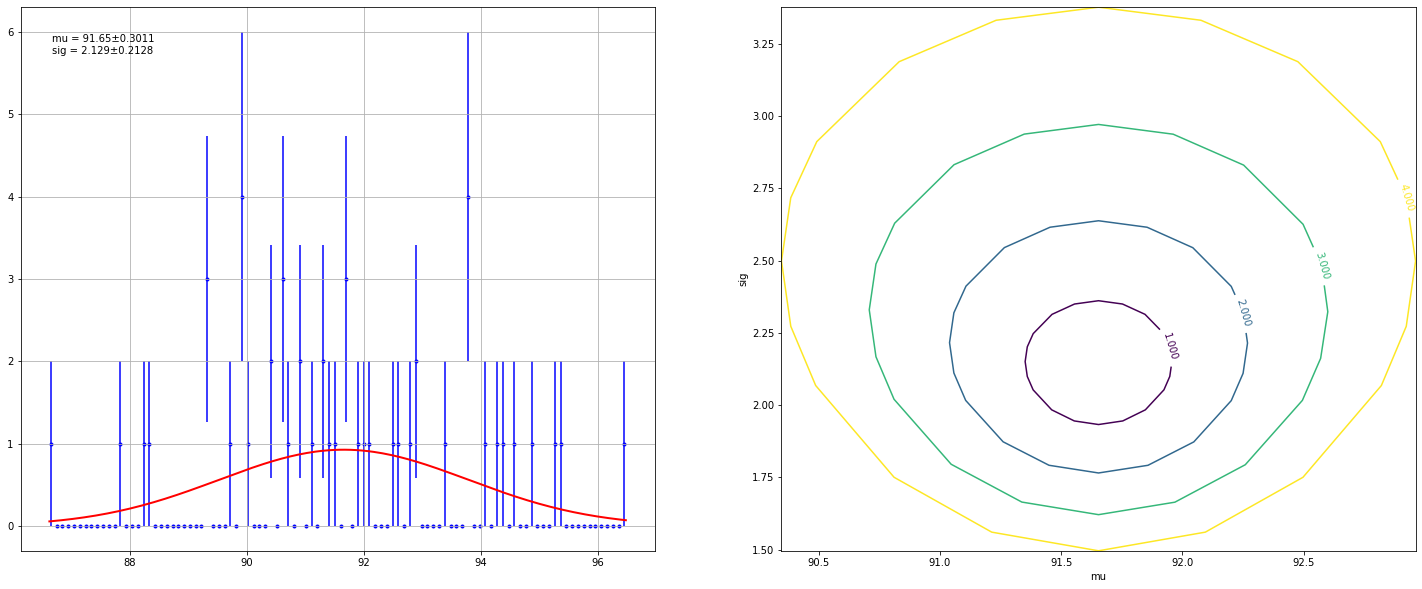

In [6]:
initials = {'mu_init':90.0, 'sig_init':5, 'limit_mu':(80,100),'limit_sig':(1,10)}
params, errs = unbinned_gaus_LLH(data, mu_init=90, sig_init=5, limit_mu=(80,100),limit_sig=(1,10))
# params, errs = unbinned_gaus_LLH(data, **initials)
mu, sig = params

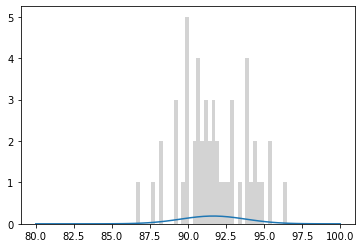

In [7]:
x_pts = np.linspace(80,100,50)
plt.plot(x_pts,gauss_fit(x_pts,*params)) # wrong implementation
plt.hist(data, color="lightgrey",bins=40)
plt.show()

In [8]:
def binned_gaus_LLH(data,mu_init,sig_init,limit_mu,limit_sig,bins=5):
    init_params = dict(mu = mu_init, sig = sig_init)
    
    unbin = probfit.BinnedLH(gauss_fit,data,bins=bins)
    m = iminuit.Minuit(unbin,**init_params, limit_sig = limit_sig, limit_mu = limit_mu, pedantic=False)
    
    m.migrad()
    params = m.values.values() 
    errs = m.errors.values()
    plt.figure(figsize=(25,10))
    plt.subplot(1,2,1)
    unbin.draw(m)
    plt.subplot(1,2,2)
    m.draw_mncontour('mu','sig',nsigma=4)
    return params, errs

FCN = 0.09141961033963494 
 TOTAL NCALL = 55 
 NCALLS = 55 
 
 
 EDM = 7.180829188951321e-07 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,mu,91.6948,0.371244,,,80,100,No
1,sig,2.30324,0.351498,,,1,10,No


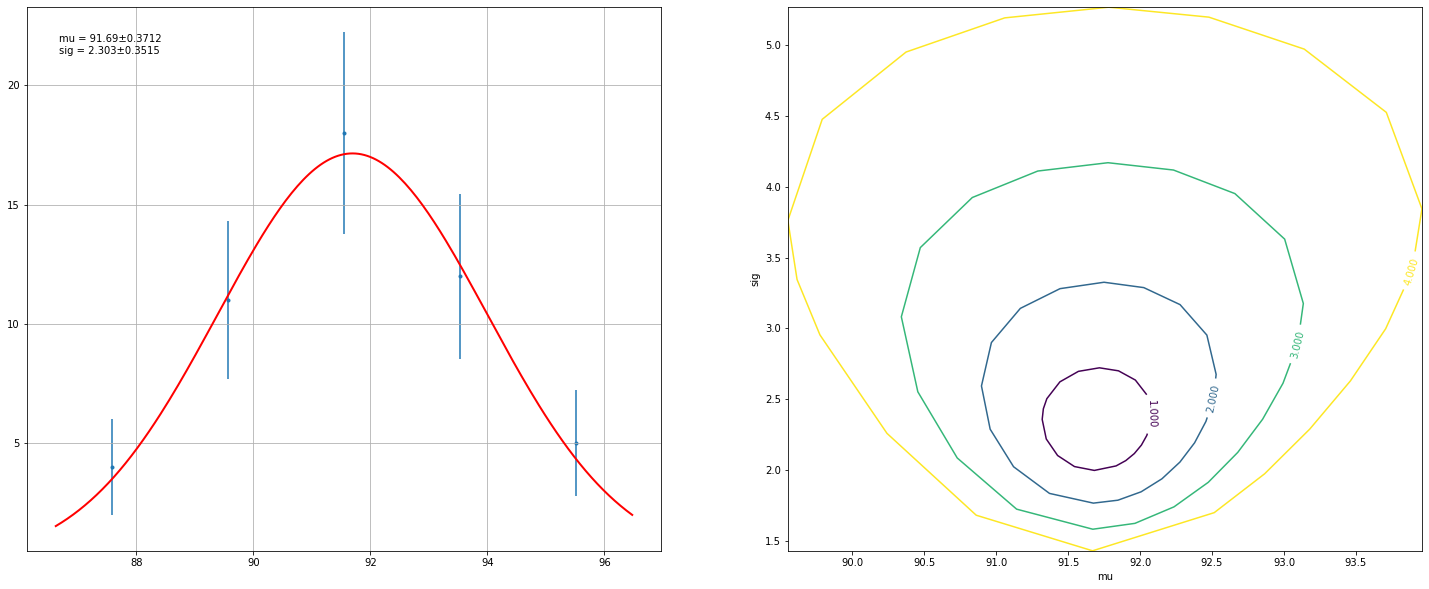

In [9]:
params, errs = binned_gaus_LLH(data, mu_init=90, sig_init=5, limit_mu=(80,100),limit_sig=(1,10))

mu, sig = params

FCN = 1.9282780598156484 
 TOTAL NCALL = 58 
 NCALLS = 58 
 
 
 EDM = 6.321229855498287e-07 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,mu,91.7156,0.351855,,,-1,100,No
1,sig,2.2577,0.314918,,,-0.1,100,No


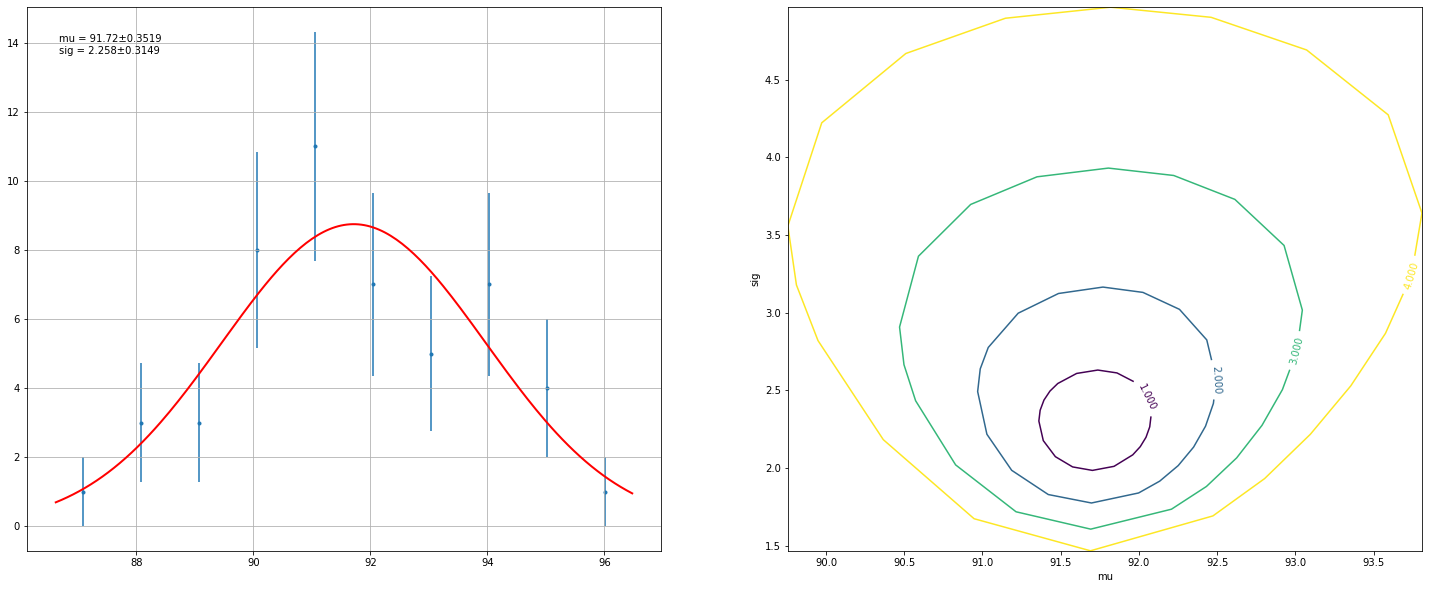

In [10]:
params, errs = binned_gaus_LLH(data, mu_init=90, sig_init=5, limit_mu=(-1,100),limit_sig=(-0.1,100),bins=10)

mu, sig = params

***

In [11]:
def random_gaus_LLH(mu_init,sig_init,limit_mu,limit_sig):
    init_params = dict(mu = mu_init, sig = sig_init, limit_sig = limit_sig, limit_mu = limit_mu)
    
    mu = 91.3
    sigma = 5
    data = np.random.normal(mu, sigma, 50)
    unbin = probfit.UnbinnedLH(gauss_fit,data)


    m = iminuit.Minuit(unbin,**init_params)
    
    m.migrad()
    params = m.values.values()
    errs = m.errors.values()
    plt.figure(figsize=(30,15))
    plt.subplot(1,2,1)
    unbin.draw(m)
    plt.subplot(1,2,2)
    m.draw_mncontour('mu','sig',nsigma=4)
    return params, errs

/home/john/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: InitialParamWarning: Parameter mu is floating but does not have initial step size. Assume 1.
  # Remove the CWD from sys.path while we load stuff.
/home/john/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: InitialParamWarning: Parameter sig is floating but does not have initial step size. Assume 1.
  # Remove the CWD from sys.path while we load stuff.


FCN = 147.39366199389997 
 TOTAL NCALL = 45 
 NCALLS = 45 
 
 
 EDM = 9.850268640929354e-08 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,mu,90.9536,0.651949,,,80,100,No
1,sig,4.61327,0.460488,,,1,10,No


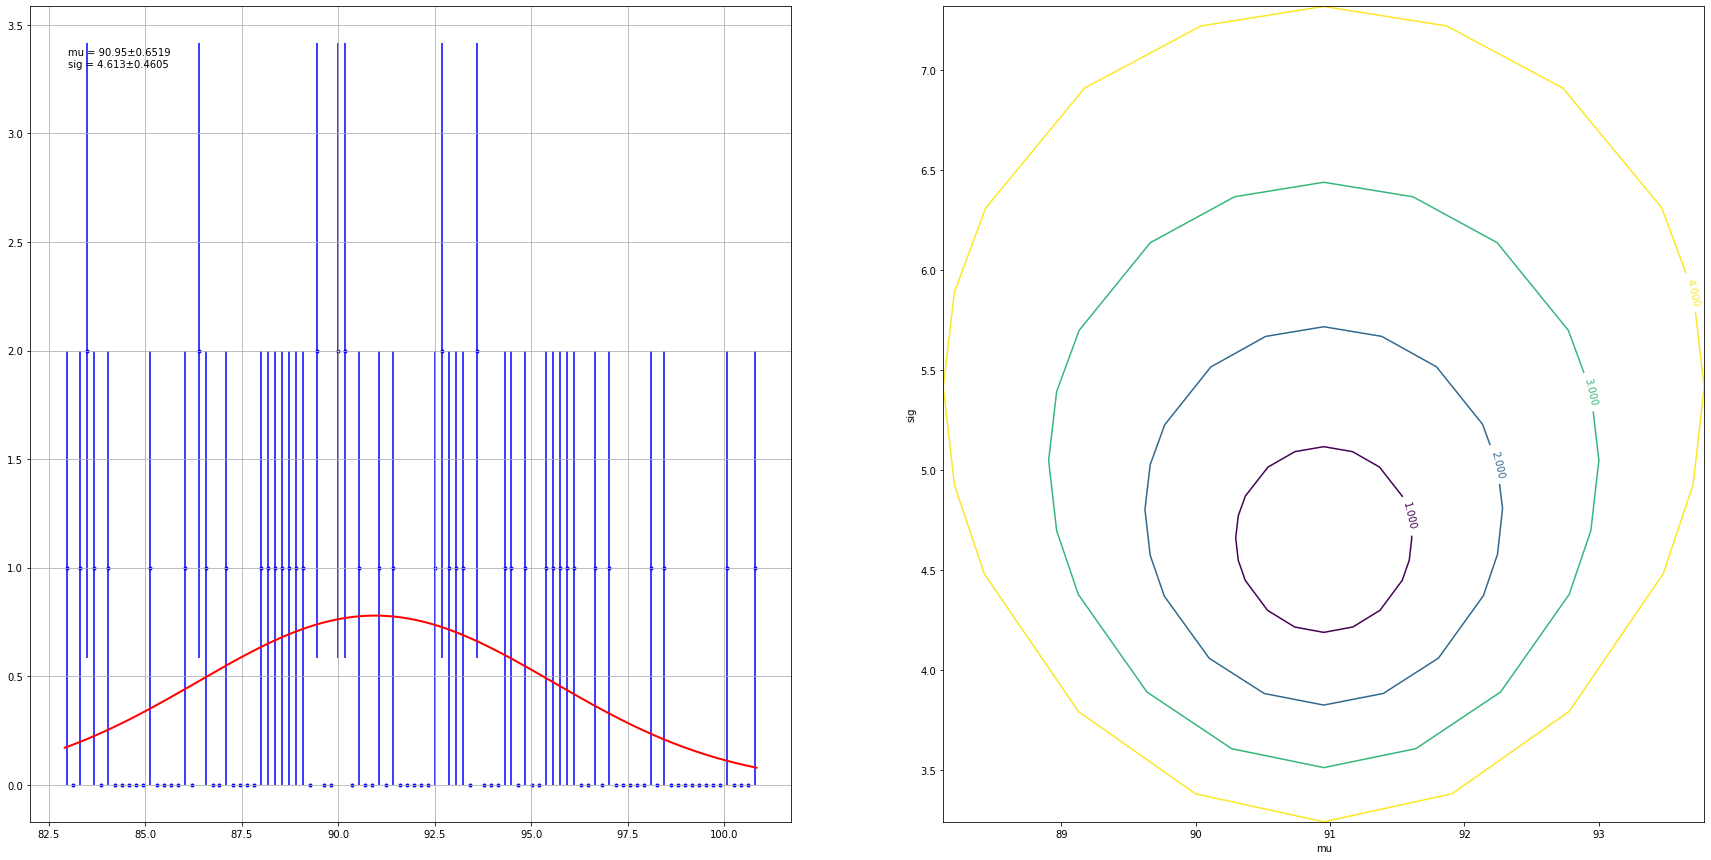

In [12]:
params, errs = random_gaus_LLH(mu_init=90, sig_init=6, limit_mu=(80,100),limit_sig=(1,10))

mu, sig = params